In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5,NaN,4.0,5.0,7.0,10.0,3.0,NaN,1
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
680,5,10.0,NaN,NaN,4.0,10.0,5.0,6.0,3
681,1,NaN,1.0,3.0,2.0,NaN,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	64
float64		column 3	82
float64		column 4	32
float64		column 5	32
float64		column 6	16
float64		column 7	50
float64		column 8	16
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,619.000000,601.000000,651.000000,651.000000,667.000000,633.000000,667.000000,683.000000
mean,4.442167,3.029079,3.109817,2.757296,3.173579,3.521739,3.368088,2.880060,1.603221
std,2.820761,2.971133,2.922542,2.798256,2.143105,3.633849,2.414105,3.060551,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,5.000000,3.000000,4.000000,6.000000,4.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

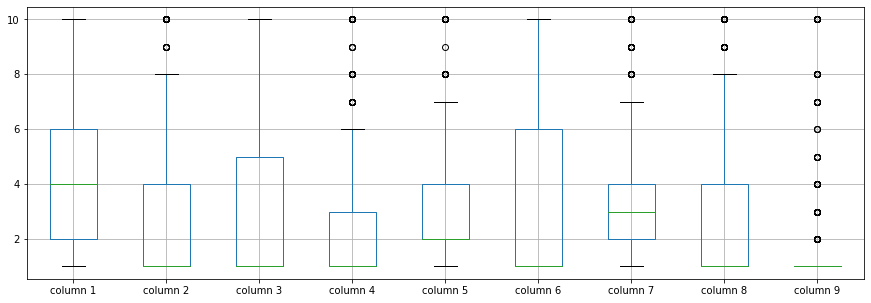

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.029079
column 3    3.109817
column 4    2.757296
column 5    3.173579
column 6    3.521739
column 7    3.368088
column 8    2.880060
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.626035,0.652605,0.484675,0.509885,0.587451,0.537185,0.529563,0.350957
column 2,0.626035,1.000000,0.910406,0.682201,0.723590,0.704344,0.738715,0.703014,0.444374
column 3,0.652605,0.910406,1.000000,0.692237,0.698636,0.698744,0.725808,0.734090,0.444188
column 4,0.484675,0.682201,0.692237,1.000000,0.575161,0.669736,0.648854,0.591642,0.398697
column 5,0.509885,0.723590,0.698636,0.575161,1.000000,0.588961,0.594713,0.601562,0.417308
column 6,0.587451,0.704344,0.698744,0.669736,0.588961,1.000000,0.678341,0.585280,0.338683
column 7,0.537185,0.738715,0.725808,0.648854,0.594713,0.678341,1.000000,0.663768,0.350619
column 8,0.529563,0.703014,0.734090,0.591642,0.601562,0.585280,0.663768,1.000000,0.433752
column 9,0.350957,0.444374,0.444188,0.398697,0.417308,0.338683,0.350619,0.433752,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+54,9+54+54,9+54+54,9+54+54+54+54,9+54+54+54,9+54+54,9+54,9], vae_layer = False, seed = 540)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 34.56805315471831
Epoch: 1 , loss: 34.59874362037296
Epoch: 2 , loss: 34.30379090990339
Epoch: 3 , loss: 34.13688643773397
Epoch: 4 , loss: 32.94418766385033
Epoch: 5 , loss: 29.585771288190568
Epoch: 6 , loss: 28.750721704392205
Epoch: 7 , loss: 28.596117337544758
Epoch: 8 , loss: 28.232861564272927
Epoch: 9 , loss: 27.33341811952137
Epoch: 10 , loss: 27.114372071765718
Epoch: 11 , loss: 26.542702402387345
Epoch: 12 , loss: 25.86343933287121
Epoch: 13 , loss: 25.97085768835885
Epoch: 14 , loss: 25.76507327670143
Epoch: 15 , loss: 25.229863938831148
Epoch: 16 , loss: 24.48017488207136
Epoch: 17 , loss: 24.55048776808239
Epoch: 18 , loss: 24.452607336498442
Epoch: 19 , loss: 23.974949314480735
Epoch: 20 , loss: 23.933235940479097
Epoch: 21 , loss: 22.657736551193963
Epoch: 22 , loss: 23.595463094257173
Epoch: 23 , loss: 23.200403713044665
Epoch: 24 , loss: 22.496924491155717
Epoch: 25 , loss: 22.83663252

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0
1,0,-0.924693,0.00000,0.000000,0.0,0.00000,0.0,0.892713,0
2,0,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0
3,0,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0
4,0,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...
678,0,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0
679,0,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0
680,0,0.000000,-9.45842,-9.530808,0.0,0.00000,0.0,0.000000,0
681,0,-0.350144,0.00000,0.000000,0.0,-0.25939,0.0,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(59.147526902508844, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.17638697656095753

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.000000,1.00000,1.000000,2.0,1.00000,3.0,1.000000,1
1,5,3.075307,4.00000,5.000000,7.0,10.00000,3.0,2.892713,1
2,3,1.000000,1.00000,1.000000,2.0,2.00000,3.0,1.000000,1
3,6,8.000000,8.00000,1.000000,3.0,4.00000,3.0,7.000000,1
4,4,1.000000,1.00000,3.000000,2.0,1.00000,3.0,1.000000,1
...,...,...,...,...,...,...,...,...,...
678,3,1.000000,1.00000,1.000000,2.0,1.00000,2.0,1.000000,1
679,2,1.000000,1.00000,1.000000,2.0,1.00000,3.0,1.000000,1
680,5,10.000000,0.54158,0.469192,4.0,10.00000,5.0,6.000000,3
681,1,0.649856,1.00000,3.000000,2.0,0.74061,1.0,1.000000,1


In [20]:
imputations[-1].to_excel("BCW_AN_5(imp).xlsx", index=False, header=False)